In [1]:
import warnings 
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from IPython.display import HTML, display, Image
HTML('''
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<img src='banner.png' height='300'>



**MSDS 2023 Term 3 LT9** | Maria Loraine Menorca, Ian Christopher Lucas, Felicismo Lazaro III, Christine Albao, William Benedict Delfin

***

<h1 style="color: #1048CB"><b>I. Executive Summary</b></h1>

<p style="text-align: justify"> &emsp;During the pandemic, the Philippine e-commerce industry experienced one of its highest growth rates in recent years [8]. It ballooned into a 17-billion-dollar industry with 73 million active users nationwide. And is still expected to grow by 17% to reach 24 billion dollars by the end of 2025 [7]. While this level of growth looks unstoppable, the e-commerce industry still faces a few problems of their own. <p>

<p style="text-align: justify"> &emsp;One of which is customer drop-off rate, or the rate in which a customer session within the e-commerce platform leads to the customer dropping the cart and not pushing through with the sale. On the global scale, only 2.17% of customer visits lead into a sale in 2020. This is supported by the fact that customers tend to abandon their online shopping cart 69.80% of the time [6]. <p>

<p style="text-align: justify"> &emsp;A method that monitors this customer drop-off event is the customer’s propensity to purchase [5]. This is a predictive model that uses past behavioral data of a customer and predicts the likelihood of that customer to complete a transaction. In this project, we aim to analyze a customer’s propensity to purchase using machine learning techniques and interpretability methods using customer history, behavior within the website, and possible seasonal factors. <p>

<p style="text-align: justify"> &emsp;We started the project by collecting the ecommerce data from the UCI repository. We then performed exploratory data analysis on the data to prepare for the machine learning pipeline. The machine learning pipeline started with the preprocessing technique to be used, in this case we used the RobustScaler for out final machine learning model. Then we used the Random Forest Classifier as the main machine learning model because this returned the highest accuracy among all the tested classifier algorithms. <p>

<p style="text-align: justify"> &emsp;After doing the machine learning modeling and predicting, we passed the resulting best model and the dataset through a series of model interpretability techniques, SHAP and DiCE. SHAP analyzes the model and dataset and returns a scale of importance for each feature in the data, while DiCE uses counterfactual explanations to provide a case by case analysis on what one feature can be modified that will change the resulting prediction of the machine learning model. <p>

<p style="text-align: justify"> &emsp;Combining these two methods of interpretability allows for a more complete look at how the different features of the dataset interact with each other and how it affects the resulting action of the customer. After running the data through this machine learning predictive and interpretability pipeline, we arrived at the conclusion that there are three main drivers towards a customer’s propensity to purchase, the value of the page visited, the seasonality of customer visits, and the ease of search experienced by the customer. <p>

***

<h1 style="color: #1048CB"><b>II. List of Tables and Figures</b></h1>

**Table 1.** Online Shoppers Purchasing Intention - Data Dictionary
<br>

***

**Figure 1.** Target class distribution.
<br>
**Figure 2.** Distribution of GA features.
<br>
**Figure 3.** Distribution of Views per Page type.
<br>
**Figure 4.** Distribution of View duration per Page type.
<br>
**Figure 5.** Distribution of Other Nominal features.
<br>
**Figure 6.** Visitor count by day of week.
<br>

***

<h1 style="color: #1048CB"><b>III. Problem Statement</b></h1>

<p style="text-align: justify"> &emsp;The e-Commerce industry is pegged to be the future of retail in the Philippines given the increased digital adoption in the country due to the pandemic. However, customer drop-offs brought by product complexity and low purchase intent limit a business’ growth potential. While there are already efforts made in tracking and analyzing these drop-offs, knowing which aspect to focus on in the customer journey remains a challenge as there can be many points of exit that should be improved with a limited budget. Using Explainable AI, this project aims to uncover the main purchase decision drivers, and the small changes the business can do that would greatly encourage a customer to stay and proceed to purchase.</p>

***

<h1 style="color: #1048CB"><b>IV. About the Data</b></h1>

***
<h2 style="color: #1048CB"><b>Source</b></h2>

&emsp;The data used in this project is sourced from [`UCI's Machine Learning Repository`](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#), and is about how a visitor navigates through a site and whether the visit resulted to a purchase or not. With 12,330 total sessions, the data includes details such as the visitor profile, value of the pages viewed, seasonality of the visit, ease of search, interest in buying, and web traffic quality. Table 1 provides a brief description of the features in the dataset.


<br>
<center style="font-size:12px;font-style:default;"><b>Table 1. Online Shoppers Purchasing Intention - Data Dictionary</b></center>

|Feature    | Data Type     | Description                                                                           |
|:--------------|:-------------|:--------------------------------------------------------------------------------------|
|administrative|integer|indicates if the page is an administrative page. 1 if true, otherwise 0
|administrative_duration|float|indicates the duration of visit in an administrative page
|informational|integer|indicates if the page is an informational page. 1 if true, otherwise 0
|informational_duration|float|indicates the duration of visit in an informational page
|product_related|integer|indicates if the page is an product page. 1 if true, otherwise 0
|product_related_duration|float|indicates the duration of visit in an product page
|bounce_rates|float|indicates the bounce rate of a user across page visits
|exit_rates|float|indicates the exit rate of a user across page visits
|page_values|float|indicates the value of the page based on a google formula
|special_day|float|indicates whether the visit was near a speciay day. e.g. a holiday
|month|string|tells the month of visit
|operating_systems|integer|indicates the type of operating system used to enter the site
|browser|integer|indicates the type of browser used to enter the site
|region|integer|indicates region of the user
|traffic_type|integer|indicates the type of traffic type used to enter the site
|visitor_type|string|indicates the type of user visiting the site
|weekend|integer|indicates if the site visit happend during a weekend
|revenue|integer|indicates whether the site visit resulted into a sale

***

<h2 style="color: #1048CB"><b>Interpretation</b></h2>

<p style="text-align: justify"> &emsp;Given the lack of clear definition on what constitutes a certain type of page (i.e., what's the scope of an Admin-related or Product-related pages?), the following interpretations were made. Moving forward, this will be the context followed by all analyses and recommendations. </p>

1. **Administrative pages**

   Pertains to any page related to a visitor's account such as home page, profile info, transaction history, settings (e.g., security, payment options, etc.), or e-wallet.
   
   
2. **Informational pages**

   Pertains to any page related to the site's or company information such as Frequently-Asked Questions (FAQs), How-to's, About, or Contact Us page.
   

3. **Product-related pages**

   Pertains to any page related to the product or service being sold such as product catalogue, product ads (from banner or carousel), or product breakdown from the checkout page.

In [2]:
# General tools
import re
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Predictive tools
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Metrics
from sklearn.metrics import (accuracy_score,
                             recall_score, 
                             precision_score,
                             make_scorer)

# Resampling
from imblearn.over_sampling import SMOTENC, ADASYN
from imblearn.pipeline import Pipeline

# Post-hoc explainability methods
import shap
from dice_ml import Model, Dice, Data

# Hypothesis testing
from scipy import stats


# set global plotting parameters
custom_sns_params = {'lines.linewidth': 2, 'font.size': 12,
                     'axes.titlesize': 14, 'axes.labelsize': 12,
                     'xtick.labelsize': 12, 'ytick.labelsize': 12,
                     'legend.fontsize': 12, 'legend.fancybox': True,
                     'axes.spines.right': False, 'axes.spines.top': False,
                     'figure.figsize':(6, 4)}
sns.set_theme('notebook', style='ticks', rc=custom_sns_params)
colors = ['#000083', '#fca800', '#ed6600', '#fd0fd0', '#f1184e']
custom_palette = sns.blend_palette(colors)
sns.set_palette(custom_palette)

randstate = 143
np.random.seed(randstate)

# define a global parameter figure counter
fig_n = 1
def fig_count():
    global fig_n
    fig_n += 1
    return fig_n

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8jz7z0wv because the default path (/home/mmenorca/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
def change_case(str):
    """
    Convert camel to snake case.
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1\2', str)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [4]:
fname = 'online_shoppers_intention.csv'
df = pd.read_csv(fname).rename(columns=lambda x: change_case(x))

df['revenue'] = df.revenue.replace({False: 0, True: 1})
df['weekend'] = df.weekend.replace({False: 0, True: 1})

# Define numerical and categorical features
numerical = ['administrative', 'administrative_duration', 'informational',
             'informational_duration', 'product_related', 'product_related_duration',
             'bounce_rates', 'exit_rates', 'page_values', 'special_day']
to_enc = ['month', 'operating_systems', 'browser', 'region',
          'traffic_type', 'visitor_type']
categorical = list(set(df.columns) - set(numerical))

***

<h1 style="color: #1048CB"><b>V. Exploratory Data Analysis</b></h1>

In [5]:
# Group the categorical features based on what they are about
page_rates = ['bounce_rates', 'exit_rates', 'page_values']
user_visits = ['administrative', 'informational', 'product_related']
page_duration = ['administrative_duration','informational_duration', 
                 'product_related_duration']
user_system = ['month', 'operating_systems', 'browser', 'region',
               'traffic_type']
indicators = ['visitor_type', 'weekend']

***
<h2 style="color: #1048CB"><b>Data Quality</b></h2>

<p style="text-align: justify"> &emsp;There are no missing values in the dataset, and all of the features have the correct data type - 10 numeric, and 8 categorical features. Among the 8 categorical features, `traffic_type` and `browser` have the most number of categories of 20 and 13, respectively. Whereas `weekend` and `revenue` are just either 1 for True, or 0 for False. </p>

In [6]:
print('Number of missing values per feature:')
df.isnull().sum()

Number of missing values per feature:


administrative              0
administrative_duration     0
informational               0
informational_duration      0
product_related             0
product_related_duration    0
bounce_rates                0
exit_rates                  0
page_values                 0
special_day                 0
month                       0
operating_systems           0
browser                     0
region                      0
traffic_type                0
visitor_type                0
weekend                     0
revenue                     0
dtype: int64

In [7]:
print('Data type of each feature:')
df.info()

Data type of each feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12330 non-null  int64  
 1   administrative_duration   12330 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    12330 non-null  float64
 4   product_related           12330 non-null  int64  
 5   product_related_duration  12330 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   special_day               12330 non-null  float64
 10  month                     12330 non-null  object 
 11  operating_systems         12330 non-null  int64  
 12  browser                   12330 non-null  int64  
 13  region                    12330 no

In [8]:
print('Number of categories per feature:')
df[categorical].nunique().sort_values(ascending=False)

Number of categories per feature:


traffic_type         20
browser              13
month                10
region                9
operating_systems     8
visitor_type          3
weekend               2
revenue               2
dtype: int64

***
<h2 style="color: #1048CB"><b>Class imbalance</b></h2>

<p style="text-align: justify"> &emsp;The dataset is moderately imbalanced having only 15.47% (1,908) positive class samples. The Proportional Chance Criterion (PCC) suggests that 73.8% of the time, the model will correctly classify the dataset by chance alone. </p>

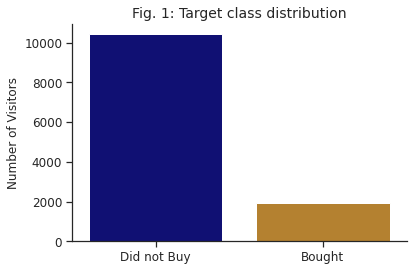

In [9]:
df_plt = (df.groupby('revenue').size()
            .rename({0: 'Did not Buy', 1: 'Bought'}).reset_index(name='c'))
ax = sns.barplot(x='revenue', y='c', data=df_plt)
ax.set(xlabel='', ylabel='Number of Visitors',
       title=f'Fig. {fig_n}: Target class distribution');
_ = fig_count()

In [10]:
pcc = np.sum((df.revenue.value_counts() / len(df))**2)
print(f'PCC: {pcc:.3f} -- 1.25 x PCC: {pcc*1.25:.3f}')

PCC: 0.738 -- 1.25 x PCC: 0.923


***
<h2 style="color: #1048CB"><b>Google Analytics (GA) Metrics</b></h2>

<p style="text-align: justify"> &emsp;These features mainly describe the user behavior when browsing through the ecommerce site. Majority of the pages that users last visited have bounce rates between 0-0.025, exit rates at 0 - 0.05, and page values at 0-50. These indicate that the users are in the website briefly with very few page bounces before closing the site or purchasing an item. The average page value of the site is around 5.9 which means that each page is worth 5.9 dollars on a customer session. </p>

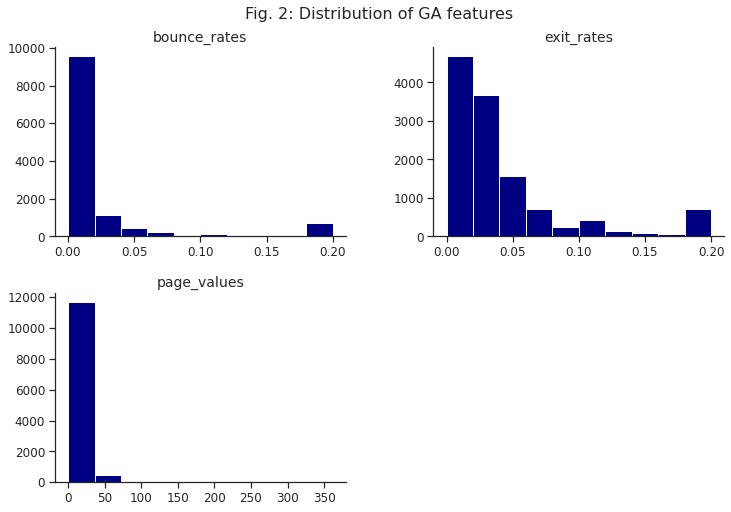

In [11]:
df[page_rates].hist(figsize=(12,8), grid=False)
plt.suptitle(f'Fig. {fig_n}: Distribution of GA features',
             fontsize=16, y=0.95);
_ = fig_count()

***
<h2 style="color: #1048CB"><b>Page Views</b></h2>

<p style="text-align: justify"> &emsp;Majority of the Administrative and Informational page visits are very low at approximately 0-5 visits per session. Whereas product-related page visits make up the majority of views at around 0-100 page visits per session. </p>

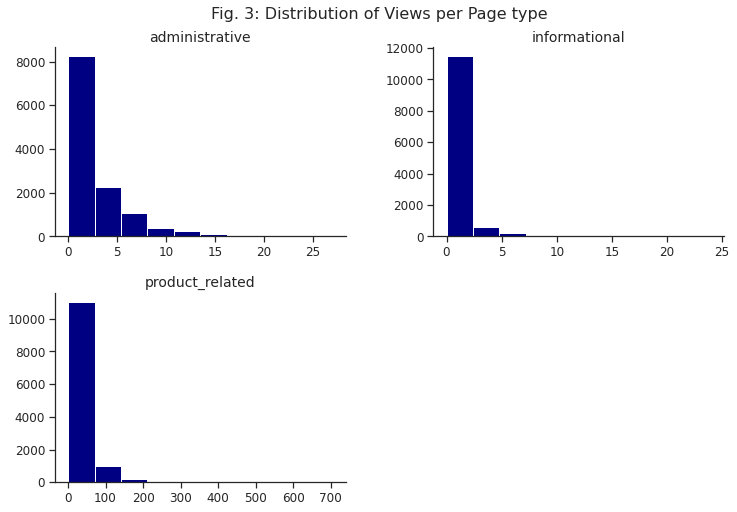

In [12]:
df[user_visits].hist(figsize=(12,8), grid=False)
plt.suptitle(f'Fig. {fig_n}: Distribution of Views per Page type',
             fontsize=16, y=0.95);
_ = fig_count()

***
<h2 style="color: #1048CB"><b>Page View Duration</b></h2>

<p style="text-align: justify"> &emsp;Both Administrative and Informational page visit durations are low at around 0-250 seconds the majority of the time. A user session is mostly spent visiting product pages where most sessios in product pages last between 0-5000 seconds. These duration values suggest that customers spend an average of 80 seconds in administrative pages, 34 seconds in informational pages and 1194 seconds in product pages. </p>

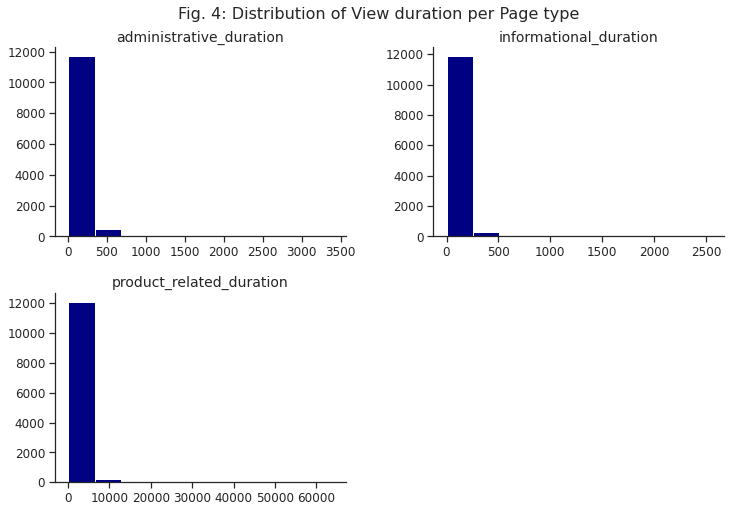

In [13]:
df[page_duration].hist(figsize=(12,8), grid=False)
plt.suptitle(f'Fig. {fig_n}: Distribution of View duration per Page type',
             fontsize=16, y=0.95);
_ = fig_count()

***
<h2 style="color: #1048CB"><b>Web Traffic Quality, Device info, and Visitor Location</b></h2>

<p style="text-align: justify"> &emsp;The following features describe the type of machine and general location of the user when the session was started. Unfortunately, data source did not go further into describing what these labels correspond to. e.g., number 2 in operating system can be attributed to windows since it is the most popular operating system in the world. </p>

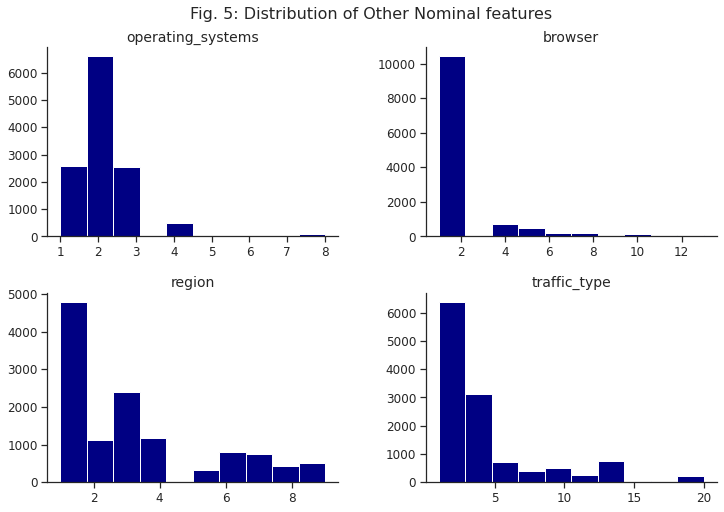

In [14]:
df[user_system].hist(figsize=(12,8), grid=False)
plt.suptitle(f'Fig. {fig_n}: Distribution of Other Nominal features',
             fontsize=16, y=0.95);
_ = fig_count()

***
<h2 style="color: #1048CB"><b>Seasonality of Visit</b></h2>

<p style="text-align: justify"> &emsp;Interestingly, the majority of visits did not happen during a weekend. With 77% of it happening during the weekday. Although no further information was given about the time of day, or the specific day of week. </p>

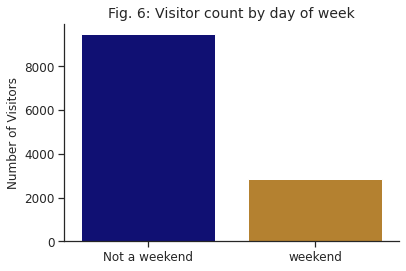

In [15]:
df_plt = (df.groupby('weekend').size()
            .rename({0: 'Not a weekend', 1: 'weekend'}).reset_index(name='c'))
ax = sns.barplot(x='weekend', y='c', data=df_plt)
ax.set(xlabel='', ylabel='Number of Visitors',
       title=f'Fig. {fig_n}: Visitor count by day of week');
_ = fig_count()

***
<h2 style="color: #1048CB"><b>Test of Independence</b></h2>

&emsp;In the following cells, we determine whether different categorical variables are independent of each other or from the target value `revenue` using the Chi-squared test of independence. Results show that we reject the null hypothesis that `visitor_type` and `revenue` are independent. Hence, one strategy that the business can consider is coming up with appropriate campaigns to each vistor type that will incentivize e-shoppers to purchase. Similar observations can also be observed with other categorical features, except for `region`.

In [42]:
def chi_squared_test():
    """
    Hypothesis test used to test whether two categorical variables are 
    related to each other.
    """
    discrete_features = ['administrative', 'informational', 
                     'product_related', 'month', 
                     'operating_systems', 'browser', 
                     'region', 'traffic_type', 
                     'visitor_type', 'weekend']

    chi_squared_df = pd.DataFrame(columns=['feature', 'pval', 'dependent'])
    
    for i, col in enumerate(discrete_features):
        x = df.groupby(['revenue', col])[col].count().unstack(1).fillna(0).astype('int')
        res = stats.chi2_contingency(x.values)
        pval = res[1]

        if pval < 0.05:
            dependent = 'Yes'
        else:
            dependent = 'No'

        chi_squared_df.loc[i] = [col, round(pval,3), dependent]
    return chi_squared_df

In [43]:
chi_squared_test()

,feature,pval,dependent
0,administrative,0.000,Yes
1,informational,0.000,Yes
2,product_related,0.000,Yes
3,month,0.000,Yes
4,operating_systems,0.000,Yes
5,browser,0.006,Yes
6,region,0.321,No
7,traffic_type,0.000,Yes
8,visitor_type,0.000,Yes
9,weekend,0.001,Yes


***

<h1 style="color: #1048CB"><b>VI. Method</b></h1>

***
<h2 style="color: #1048CB"><b>Data Pre-processing</b></h2>

&emsp;In preparation for the predictive modeling, the 6 nominal features (`month`, `operating_systems`, `browser`, `region`, `traffic_type`, and `visitor_type`) were One-Hot encoded to represent them as a binary variable with either 1 or 0 as their value. This representation ensures that the model will not assume any order and that each value is treated with equal importance.

In [16]:
# One-Hot encoding of categorical variables
df_enc = pd.get_dummies(df, columns=to_enc, drop_first=True)
cat_enc = list(set(df_enc.columns) - set(numerical))
cat_enc_idx = sorted([df_enc.columns.get_loc(c) for c in cat_enc])
df_enc.iloc[:, cat_enc_idx] = df_enc.iloc[:, cat_enc_idx].astype('int64')

In [17]:
df_enc.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,...,traffic_type_13,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20,visitor_type_Other,visitor_type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


***
<h2 style="color: #1048CB"><b>Predictive Modeling</b></h2>

***
**Train-test split**

&emsp;20% of the dataset (2,466) was assigned as the test set, and the remaining as train-validation set. During this split, the target (`revenue`) was stratified such that the proportion of its values in the sample will remain the same as that in the whole dataset.

In [18]:
# Split the data into train, validation, and test set
randstate = 143
testsize = 0.20
target = 'revenue'

x, y = df_enc.drop(target, axis=1), df_enc[target]
x_trainval, x_test, y_trainval, y_test = train_test_split(x, y,
                                                          random_state=randstate,
                                                          test_size=testsize,
                                                          stratify=y)
print(f'x train-val shape: {x_trainval.shape} -- x test shape: {x_test.shape}')

x train-val shape: (9864, 68) -- x test shape: (2466, 68)


**Feature Scaling**

&emsp;As a pre-processing step before training and generating predictions, the numerical features were first scaled using `RobustScaler` [1], which removes the median and scales the data based on its InterQuantile Range (IQR), due to the presence of outliers.


**Classification**

&emsp;With the goal of predicting whether a visit would render a purchase or not, the best model among 4 classifiers - Lasso, Linear SVC, Random Forest, and Gradient Boosting was then identified based on which generates the highest average recall using the validation dataset. The inverse of the regularization parameter, `C`, of the Lasso and Linear SVC models were tuned to get the optimal parameter that give out the best results on average within 5 trials. The same was done for the Random Forest and Gradient Boosting models but with the maximum depth, `max_depth`, and maximum features, `max_features` as the hyperparameters to tune.

&emsp;In this context, recall was deemed as the most important metric and was used to evaluate the models' performance. We chose to focus on the "completeness" of the predictions since it will be more costly if the model misses potential revenue-generating visitors than the additional marketing cost that could come from reaching out to incorrectly tagged visitors. Thus, the goal is to identify as many potential buyers as possible even if the accuracy is quite low.

In [19]:
def tune_pred_model(pipe, params, folds, metrics, refit=True, refit_on='recall'):
    """
    Return the results of GridSearchCV.
    """
    if refit:
        return GridSearchCV(estimator=pipe,
                           param_grid=params,
                           cv=folds,
                           scoring=metrics,
                           refit=refit_on, 
                           n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                           return_train_score=True, # True to return both the train and test scores
                           verbose=1,
                           pre_dispatch=5) 
    else:
        return GridSearchCV(estimator=pipe,
                   param_grid=params,
                   cv=folds,
                   scoring=metrics,
                   n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                   return_train_score=True, # True to return both the train and test scores
                   verbose=1,
                   pre_dispatch=5) 

In [20]:
# Define the pipeline for each model
logl1 = Pipeline((
                    ('scaler', RobustScaler()),
                    ('m', LogisticRegression(penalty='l1',
                                               solver='liblinear',
                                               max_iter=500_000))
                 ))
svc = Pipeline((
                ('scaler', RobustScaler()),
                ('m', LinearSVC(penalty='l2'))
               ))

rf = Pipeline((
                ('scaler', RobustScaler()),
                ('m', RandomForestClassifier(random_state=randstate,
                                             n_estimators=250))
               ))
gb = Pipeline((
                ('scaler', RobustScaler()),
                ('m', GradientBoostingClassifier(random_state=randstate,
                                                 n_estimators=250))
               ))

# Define parameters of each model
depth = [3, 5, 7, 10]
max_features = sorted([0.3, 0.5, 0.7, 0.9])
C = sorted([1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3,
            5, 10, 15, 20, 100, 300])

params_logl1 = {'m__C': C} 
params_svc = {'m__C': C}
params_rf = {'m__max_depth': depth,
             'm__max_features': max_features}
params_gb = {'m__max_depth': depth,
             'm__max_features': max_features}


# Tune the hyperparameters of each model
models = ['LassoClassifier', 'LinearSVC',
          'RandomForestClassifier', 'GradientBoostingClassifier']
pipes_model = [logl1, svc, rf, gb]
params_model = [params_logl1, params_svc, params_rf, params_gb]
print(f'Pipes: {len(pipes_model)} -- Params: {len(params_model)}')

kfolds = 5

# Perform hyperparameter tuning on different models
scoring = ['accuracy', 'recall', 'precision']

time_lst = []
gscv_lst = []
for idx, m in enumerate(models):
    start = time.time()
    gscv_model = tune_pred_model(pipes_model[idx],
                             params_model[idx],
                             kfolds,
                             scoring,
                             refit=True)
    gscv_model.fit(x_trainval, y_trainval)
    gscv_lst.append(gscv_model)
    time_lst.append(start - time.time())
    
# Collate the results of each of the Classifiers
res_dict = {}

for idx, cv in enumerate(gscv_lst):
    cv_results = cv.__dict__['cv_results_']
    
    optim_idx = cv.best_index_
    res_dict[models[idx]] = {'avg_fit_time': cv_results['mean_fit_time'][optim_idx],
                             'avg_train_accuracy': 100*cv_results['mean_train_accuracy'][optim_idx],
                             'avg_train_recall': 100*cv_results['mean_train_recall'][optim_idx],
                             'avg_train_precision': 100*cv_results['mean_train_precision'][optim_idx],
                             'avg_val_accuracy': 100*cv_results['mean_test_accuracy'][optim_idx],
                             'avg_val_recall': 100*cv_results['mean_test_recall'][optim_idx],
                             'avg_val_precision': 100*cv_results['mean_test_precision'][optim_idx],
                             'best_params': cv.best_params_}

Pipes: 4 -- Params: 4
Fitting 5 folds for each of 17 candidates, totalling 85 fits


/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/met

Fitting 5 folds for each of 17 candidates, totalling 85 fits


/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/msds2023/mmenorca/.local/lib/python3.9/site-packages/s

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


**Resampling**

&emsp;Since the dataset is moderately imbalanced, resampling was added in the pipeline. The best resampling method to use with the best predictive model identified in the previous step was determined based on the same metric, recall. Two resampling methods (`SMOTENC` and `ADASYN`), that were deemed to work best on data with mixed numerical and categorical features were tested.

&emsp;Similarly, the model with the best resampling method was then tuned to get the hyperparameters that would give the best results on average within 5 trials.

In [21]:
def tune_resampler(nsplits, resamplers_dict, x_trainval, y_trainval,
                   scaler, best_pred_model):
    """
    Return the average accuracy, precision, and recall scores of
    different resampling methods.
    """
    skf = StratifiedKFold(n_splits=nsplits)
    res = {}
    raw_res = {}

    for resampler_name, resampler in tqdm(resamplers_dict.items()):

        train_acc = []
        val_acc = []
        train_recall = []
        val_recall = []
        train_precision = []
        val_precision = []

        for train_idx, val_idx in skf.split(x_trainval, y_trainval):
            x_train, y_train = x_trainval.iloc[train_idx], y_trainval.iloc[train_idx]
            x_val, y_val = x_trainval.iloc[val_idx], y_trainval.iloc[val_idx]

            # Define pipeline
            steps = [('scaler', scaler),
                     (resampler_name, resampler),
                     ('model', best_pred_model)]
            pipeline = Pipeline(steps)
            pipeline.fit(x_train, y_train)

            # Predict
            train_pred = pipeline.predict(x_train)
            val_pred = pipeline.predict(x_val)

            # Evaluate predictions
            train_acc.append(accuracy_score(y_train, train_pred))
            val_acc.append(accuracy_score(y_val, val_pred))
            train_recall.append(recall_score(y_train, train_pred))
            val_recall.append(recall_score(y_val, val_pred))
            train_precision.append(precision_score(y_train, train_pred))
            val_precision.append(precision_score(y_val, val_pred))

        # Get the average of each metric
        res[resampler_name] = {
                                'avg_train_accuracy': 100*np.mean(train_acc),
                                'avg_train_recall': 100*np.mean(train_recall),
                                'avg_train_precision': 100*np.mean(train_precision),
                                'avg_val_accuracy': 100*np.mean(val_acc),
                                'avg_val_recall': 100*np.mean(val_recall),
                                'avg_val_precision': 100*np.mean(val_precision)
                              }

    return res

In [22]:
# Define categorical features without the target
cat_enc_features = list(set(x.columns) - set(x.loc[:, numerical].columns))
cat_enc_features_idx = [x.columns.get_loc(i) for i in cat_enc_features]

# Define the different resampling methods to use
resamplers_dict = {'SMOTENC': SMOTENC(random_state=randstate,
                                      categorical_features=cat_enc_features_idx), 
                   'ADASYN': ADASYN(random_state=randstate)}

***
<h2 style="color: #1048CB"><b>Post-hoc Explainability Methods</b></h2>

**SHapley Additive exPlainations (SHAP)**

<p style="text-align: justify"> &emsp;SHAP calculates the marginal contribution of each feature to the prediction [2]. It is based on the concept of game theory which aims to figure out how to distribute a gain of a coalition fairly by considering the output of each possible combination of players [3]. SHAP can determine the most important features and their influence on the model prediction. </p>

**Diverse Counterfactual Explainations (DiCE)**

&emsp;Counterfactuals provide explanations that describe the smallest changes one can do to a feature to change the prediction to the desired output [3]. These are conditional sentences which discuss what would have been true under different circumstances, e.g. "If Peter believed in ghosts, he would be afraid to be here." Counterfactuals are contrasted with indicatives, which are generally restricted to discussing open possibilities. They are characterized grammatically by their use of fake tense morphology, which some languages use in combination with other kinds of morphology including aspect and mood. In this project, we used `DiCE` [4], a Python package to generate these counterfactual explanations.

***

<h1 style="color: #1048CB"><b>VII. Results</b></h1>

***
<h2 style="color: #1048CB"><b>Best Predictive Model</b></h2>

<p style="text-align: justify"> &emsp; With an average validation recall of 60.9%, the best predictive model is a Random Forest Classifier with a maximum depth of 5, maximum features of 0.7, and 250 estimators. </p>

In [23]:
df_pred_res = (pd.DataFrame(res_dict).T
                .sort_values(by=['avg_val_recall', 'avg_val_precision', 'avg_val_accuracy'],
                             ascending=[False, False, False]))
df_pred_res.head()

,avg_fit_time,avg_train_accuracy,avg_train_recall,avg_train_precision,avg_val_accuracy,avg_val_recall,avg_val_precision,best_params
RandomForestClassifier,3.45879,91.593168,64.810489,77.195906,90.389261,60.875174,72.931967,"{'m__max_depth': 5, 'm__max_features': 0.7}"
GradientBoostingClassifier,3.794889,94.107365,73.83722,86.092312,89.983787,60.418301,70.808698,"{'m__max_depth': 3, 'm__max_features': 0.9}"
LassoClassifier,0.051851,88.082923,58.191458,62.294559,88.05757,58.127933,62.29934,{'m__C': 0.0001}
LinearSVC,0.066479,88.20458,57.863831,62.917861,88.229881,57.931426,63.050377,{'m__C': 1e-08}


In [24]:
# Save the best predictive model
best_pred_model = gscv_lst[models.index(df_pred_res.index[0])].best_estimator_
best_pred_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('m',
                 RandomForestClassifier(max_depth=5, max_features=0.7,
                                        n_estimators=250, random_state=143))])

***
<h2 style="color: #1048CB"><b>Best Resampling Method</b></h2>

<p style="text-align: justify"> &emsp;The best resampling method is ADASYN with an average validation recall of 84.0%. ADASYN was able to reduce the bias caused by the class imbalance in the dataset and had the advantage of shifting the classification boundary toward samples that are more difficult to learn. </p>

In [25]:
# Determine the best resampling method
res_dict = tune_resampler(10, resamplers_dict, x_trainval, y_trainval,
                           RobustScaler(), best_pred_model['m'])

# Collate results into a pandas DataFrame
df_resampled = pd.DataFrame(res_dict).T.sort_values('avg_val_recall', ascending=False)
df_resampled.head()

100%|██████████| 2/2 [04:57<00:00, 148.51s/it]


,avg_train_accuracy,avg_train_recall,avg_train_precision,avg_val_accuracy,avg_val_recall,avg_val_precision
ADASYN,85.717975,86.806295,52.400487,84.914764,84.006708,50.856203
SMOTENC,87.959578,82.510451,57.780917,87.429042,81.386309,56.756800


In [26]:
# Save the best resampling method
best_resampler = resamplers_dict[df_resampled.index[0]]
# best_resampler

After testing for different numbers of neighbors to consider in `ADASYN`, having 4 neighbors gave out the best recall and was thus considered for the final model pipeline.

In [27]:
# Tune the hyperparameters of the best resampling method
kfolds = 5
scoring = ['accuracy', 'recall', 'precision']
n_neighbors = range(3, 10)

# Define paramaters and pipeline
pipe_resampler = Pipeline([('scaler', RobustScaler()),
                           ('resampler', best_resampler),
                           ('model', best_pred_model['m'])])
param_grid_resampler = [
                        {'resampler': [best_resampler], 
                         'resampler__n_neighbors': n_neighbors}
                     ]

# Grid search using 5-fold CV with recall scoring metric
gscv_resampler = tune_pred_model(pipe_resampler,
                                 param_grid_resampler,
                                 kfolds,
                                 scoring,
                                 refit=True)
gscv_resampler.fit(x_trainval, y_trainval);

# Save the best resampler
best_resampler = gscv_resampler.best_estimator_['resampler']
best_resampler

Fitting 5 folds for each of 7 candidates, totalling 35 fits


ADASYN(n_neighbors=4, random_state=143)

***
<h2 style="color: #1048CB"><b>Final Pipeline</b></h2>

<p style="text-align: justify"> &emsp;Using the best predictive model and resampling method identified in the previous sections, the final pipeline is shown below. This generated an 83.8% recall, 49.5% precision, and 84.3% accuracy when evaluated using the test set. </p>

In [28]:
best_model = Pipeline([('scaler', RobustScaler()),
                       ('resampler', best_resampler),
                       ('model', best_pred_model['m'])])
best_model.fit(x_trainval, y_trainval);

best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('resampler', ADASYN(n_neighbors=4, random_state=143)),
                ('model',
                 RandomForestClassifier(max_depth=5, max_features=0.7,
                                        n_estimators=250, random_state=143))])

In [29]:
# Collate the summary of the results in a dataframe
summary = {'No Resampling': df_pred_res.iloc[0, 1:7].to_dict()}
summary.update(df_resampled.T.to_dict())
df_summary = (pd.DataFrame(summary).T.sort_values(by='avg_val_recall',
                                                    ascending=False))
display(df_summary)

# Evaluate the best model using the test dataset
test_pred = best_model.predict(x_test)
res_test = { 
             'test_accuracy': accuracy_score(y_test, test_pred),
             'test_recall': recall_score(y_test, test_pred),
             'test_precision': precision_score(y_test, test_pred)
           }
print('Performance of the Best model evaluated using the Test set:')
print(f'Test Accuracy: {100*accuracy_score(y_test, test_pred):.3f}%')
print(f'Test Recall: {100*recall_score(y_test, test_pred):.3f}%')
print(f'Test Precision: {100*precision_score(y_test, test_pred):.3f}%')

,avg_train_accuracy,avg_train_recall,avg_train_precision,avg_val_accuracy,avg_val_recall,avg_val_precision
ADASYN,85.717975,86.806295,52.400487,84.914764,84.006708,50.856203
SMOTENC,87.959578,82.510451,57.780917,87.429042,81.386309,56.756800
No Resampling,91.593168,64.810489,77.195906,90.389261,60.875174,72.931967


Performance of the Best model evaluated using the Test set:
Test Accuracy: 84.225%
Test Recall: 83.770%
Test Precision: 49.459%


***
<h2 style="color: #1048CB"><b>Post-hoc Explanations</b></h2>

***
<h3 style="color: #1048CB"><b>Global Explanations</b></h3>

<p style="text-align: justify"> &emsp;SHapley Additive exPlainations (SHAP) was then used to study the marginal contributions of each feature to the prediction and have an idea on what the key purchase decision drivers are. </p>

In [30]:
col_names_for_pres = ['Admin. Pages Viewed', 'Admin. Duration', 'Info. Pages Viewed',
                       'Info. Duration', 'Prod. Pages Viewed', 'Prod. Duration',
                       'Bounce Rate', 'Exit Rate', 'Page Value', 'Special Day', 'Weekend',
                       'Month: Dec', 'Month: Feb', 'Month: Jul', 'Month: June', 'Month: Mar',
                       'Month: May', 'Month: Nov', 'Month: Oct', 'Month: Sep',
                       'OS: 2', 'OS: 3', 'OS: 4',
                       'OS: 5', 'OS: 6', 'OS: 7',
                       'OS: 8', 'Browser: 2', 'Browser: 3', 'Browser: 4',
                       'Browser: 5', 'Browser_6', 'Browser: 7', 'Browser: 8', 'Browser: 9',
                       'Browser: 10', 'Browser: 11', 'Browser: 12', 'Browser: 13', 'Region: 2',
                       'Region: 3', 'Region: 4', 'Region: 5', 'Region: 6', 'Region: 7', 'Region: 8',
                       'Region: 9', 'Traffic Type: 2', 'Traffic Type: 3', 'Traffic Type: 4',
                       'Traffic Type: 5', 'Traffic Type: 6', 'Traffic Type: 7', 'Traffic Type: 8',
                       'Traffic Type: 9', 'Traffic Type: 10', 'Traffic Type: 11',
                       'Traffic Type: 12', 'Traffic Type: 13', 'Traffic Type: 14',
                       'Traffic Type: 15', 'Traffic Type: 16', 'Traffic Type: 17',
                       'Traffic Type: 18', 'Traffic Type: 19', 'Traffic Type: 20',
                       'Other Visitor', 'Returning Visitor']

In [31]:
# Get global feature importances using SHAP
n_samples = 1000 # can be reduced for shorter compute time

shap_exp = shap.Explainer(
                best_model.predict_proba,
                x_trainval,
                feature_names=x_trainval.columns
             )

# defining all columns avoid warning 
shap_values = shap_exp(x_test.iloc[:n_samples, :]) # gives records, features, classes
shap_explanation = shap.Explanation(
    shap_values.values[:, :, 1],
    shap_values.base_values[0][1],
    shap_values.data,
    feature_names=col_names_for_pres
)
print(f'Values: {shap_values.values.shape}') # values
print(f'Base Values: {shap_values.base_values.shape}') # base values (average)
print(f'Data: {shap_values.data.shape}') # fitted data

Permutation explainer: 1001it [06:53,  2.37it/s]                          

Values: (1000, 68, 2)
Base Values: (1000, 2)
Data: (1000, 68)


<p style="text-align: justify"> &emsp;Looking at the top 5 important features, page's value was seen to be the most important purchase decision driver among the visitors. This is followed by the seasonality of the visit, whether it's on the month of Nov. or May, the type of traffic generated, and the type of visitor whether they're returning or not. </p>


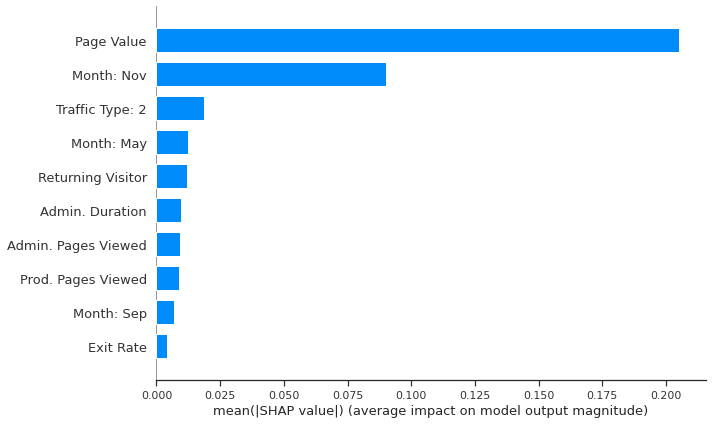

In [32]:
shap.summary_plot(shap_explanation, max_display=10, plot_size=(10, 6),
                  plot_type='bar', show=False)

Looking at the relationship between a feature's magnitude and its impact on the model's prediction, we can infer the following:

1. Having a low page value has a low impact on a visitor's decision to purchase. Pages with quality content, high utility, and clear call-to-action are the ones that would most likely encourage conversion and generate revenue.


2. Visiting on November or September has a high impact on their decision to purchase. This could be related to seasonal shopping events such as Black Friday in the US,  held on the 4th friday of November every year, or the 11.11 sale in the Philippines, held on the 11th of November every year.

    On the contrary, customers are not likely to buy when they visit on May or December. This could be attributed to how these months are either during or after the holiday season already.


3. A visitor's decision to purchase is not related to the frequency of its visit as shown by how being a returning customer has a low impact on the prediction.

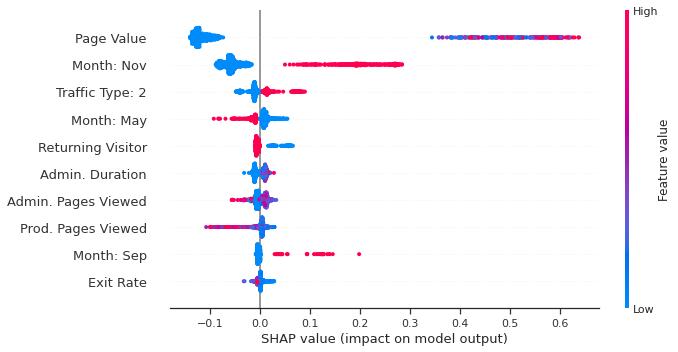

In [33]:
shap.summary_plot(shap_explanation, plot_size=(10, 5), max_display=10, show=False)

***
<h3 style="color: #1048CB"><b>Local Explanations</b></h3>

Diverse Counterfactual Explainations (DiCE) was used to study the effect of each feature in different scenarios. Specifically, we want to determine what are the small changes a business can do that would greatly encourage a visitor to stay and complete a purchase.

In this work, we considered 3 scenarios and checked which actionable features we can work on to convert a non-buying visitor into a buying customer:

1. **Seasonal visitors**

   The user visited on a special day or months before seasonal event (e.g., Nov. & Sept.).
   
   
2. **Non-Seasonal, Returning visitors**

   The user visited multiple times but not during special days or seasonal months.


3. **New visitors**

   Users who visited for the first time.
   
   
Note that since we've already seen how the value of a page (`page_value`) greatly impacts a customers' buying decision, this will be excluded in this scenario analysis, if possible, to explore other aspects that we can work on. Moreover, a business can only have little control over a page's value since it's dependent on the traffic and corresponding revenue generated on a page.

In [34]:
def cf_exp(best_pipeline, df, numeric_col, target_col,
                back_end='sklearn', dice_method='genetic'):
    """
    Return DICE explainations.
    """
    model = Model(model=best_pipeline, backend=back_end)
    dice_data = Data(dataframe=df,
                     continuous_features=numeric_col,
                     outcome_name=target_col)
    dice_exp = Dice(dice_data, model, method=dice_method)
    return dice_exp

# Define columns that are actionable
actionable_cols = ['administrative', 'administrative_duration',
                   'informational', 'informational_duration',
                   'product_related', 'product_related_duration',
                   'bounce_rates', 'exit_rates', 'page_values',
                   'special_day', 'weekend', 'month_Dec',
                   'month_Feb', 'month_Jul', 'month_June',
                   'month_Mar', 'month_May', 'month_Nov',
                   'month_Oct', 'month_Sep', 'visitor_type_Other',
                   'visitor_type_Returning_Visitor']

df_merged_train = x_trainval.join(y_trainval)

**Scenario 1: Seasonal visitor**

In [35]:
# Seasonal visitor
c1 = df_merged_train.loc[(
                    (df_merged_train.special_day > 0)
                    | (df_merged_train.month_Nov == 1)
                    | (df_merged_train.month_Sep == 1)
                  )]

c1_test = x_test.loc[(
                    (x_test.special_day > 0)
                    | (x_test.month_Nov == 1)
                    | (x_test.month_Sep == 1)
                  )]

c1_sample = c1_test.iloc[[30]] 
print(f'Prediction for a sample Seasonal visitor: {best_model.predict(c1_sample)}')

# Initiate DICE explainer
c1_dice_exp = cf_exp(best_model, c1, x_trainval.columns.tolist(), target)

Prediction for a sample Seasonal visitor: [0]


To encourage a seasonal visitor to purchase, we have to reduce the complexity and ease their search experience. This translates to decreasing the product-related and admin-related pages they need to view before finding what they're looking for, increasing the time they spend on looking at the products they're interested in, and ensuring that the pages they visit are valuable to them.

In order to decrease the pages of irrelevant items, the business could optimize the way visitors navigate through the site. This may include recommendation systems and improved product searching. For easier checkout, streamlining of the overall process must also be considered. 

Lastly, for a holistic approach, aside from doing the above, the business should drive the attention of visitors to high-value pages and convert discovered low-value pages to receive high volume of website visitor traffic. Design consdirations must also be taken into account to make these pages more attractive.

In [36]:
# Generate counterfactual explanations for a sample Seasonal visitor
cf_loc1 = c1_dice_exp.generate_counterfactuals(
                    c1_sample, 
                    total_CFs=5,
                    desired_class='opposite',
                    features_to_vary=list(set(actionable_cols) - set(['page_values'])) 
                  )
cf_loc1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

Query instance (original outcome : 0)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,...,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20,visitor_type_Other,visitor_type_Returning_Visitor,revenue
0,10.0,200.583328,1.0,86.0,65.0,1476.5,0.040097,0.059662,1.680319,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,...,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20,visitor_type_Other,visitor_type_Returning_Visitor,revenue
0,1.0,149.5,0.0,0.0,32.0,1562.3,0.0,0.1,1.7,0.2,...,-,-,-,-,-,-,-,-,-,1.0
0,6.0,110.6,-,106.0,30.0,1508.5,0.0,0.0,1.7,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,1.0,149.5,0.0,0.0,0.0,1562.3,0.0,0.0,1.7,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,4.0,126.1,2.0,43.3,34.0,1395.4,0.0,0.0,1.7,0.0,...,-,-,-,-,-,-,-,-,-,1.0


**Scenario 2: Non-Seasonal, Returning visitor**

In [37]:
c2 = df_merged_train.loc[(
                    (df_merged_train.special_day == 0)
                    & (df_merged_train.month_Nov == 0)
                    & (df_merged_train.month_Sep == 0)
                    & (df_merged_train.visitor_type_Returning_Visitor == 1)
                  )]

c2_test = x_test.loc[(
                    (x_test.special_day == 0)
                    & (x_test.month_Nov == 0)
                    & (x_test.month_Sep == 0)
                    & (x_test.visitor_type_Returning_Visitor == 1)
                  )]

c2_sample = c2_test.iloc[[2]] 
print(f'Prediction for a sample Non-seasonal, Returning visitor: {best_model.predict(c2_sample)}')

# Initiate DICE explainer
c2_dice_exp = cf_exp(best_model, c2, x_trainval.columns.tolist(), target)

Prediction for a sample Non-seasonal, Returning visitor: [0]


To encourage a non-seasonal, returning visitor to purchase, we can focus on increasing their intent to purchase, and making their search experience frictionless. To enact this, on a surface level, the business could lessen redirecting on other pages to surface out valuable infomation for a purchase. The visitor's search history may also be utilized to extract relevance of items and/or products. Relevant promotional offers may also increase the visitor's propensity to purchase.

Use contextual links and improve internal linking to reduce the number of redirects needed to reach the right page. Contextual links direct your visitors to relevant and engaging information. The business may also explore using appealing product catalog based on search history, with this, the busines may invoke recommendation and customisation systems for online shopping.

In [38]:
# Generate counterfactual explanations for a sample Returning visitor
cf_loc2 = c2_dice_exp.generate_counterfactuals(
                    c2_sample, 
                    total_CFs=5,
                    desired_class='opposite',
                    features_to_vary=actionable_cols #list(set(actionable_cols) - set(['page_values'])) 
                  )
cf_loc2.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

Query instance (original outcome : 0)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,...,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20,visitor_type_Other,visitor_type_Returning_Visitor,revenue
0,0.0,0.0,0.0,0.0,4.0,66.0,0.0,0.025,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,...,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20,visitor_type_Other,visitor_type_Returning_Visitor,revenue
0,-,-,-,-,8.0,0.0,-,0.0,40.3,-,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,-,8.0,149.0,-,0.0,64.8,-,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,-,6.0,0.0,-,0.0,15.9,-,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,-,-,102.2,-,0.0,15.9,-,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,-,3.0,259.0,-,0.0,16.3,-,...,-,-,-,-,-,-,-,-,-,1.0


**Scenario 3: New visitor**

In [39]:
c3 = df_merged_train.loc[
                    (df_merged_train.visitor_type_Other == 0)
                    & (df_merged_train.visitor_type_Returning_Visitor == 0)
                  ]

c3_test = x_test.loc[
                    (x_test.visitor_type_Other == 0)
                     & (x_test.visitor_type_Returning_Visitor == 0)
                  ]

c3_sample = c3_test.iloc[[60]]
print(f'Prediction for a sample New visitor: {best_model.predict(c3_sample)}')

# Initiate DICE explainer
c3_dice_exp = cf_exp(best_model, c3, x_trainval.columns.tolist(), target)

Prediction for a sample New visitor: [0]



To encourage a new visitor to purchase, it's important to build trust and reduce the complexity in their user experience. To entice the new visitors to come back and increase the likelihood of a purchase, the way that personal information is collected must be as short and concise as possible, especially the on-boarding process. Though there might not be enough collected data for a user to recommend products, latest and trending products can be recommended.

Other actions that can be explored by the business is to optimize the website, making it more friendly for new users. Advertisements may be useful to generate revenue from new visitors Moreover, ensuring cybersecurity may also help in locking in new visitors to return.

In [40]:
# Generate counterfactual explanations for a sample New visitor
cf_loc3 = c3_dice_exp.generate_counterfactuals(
                    c3_sample,
                    total_CFs=10,
                    desired_class='opposite',
                    features_to_vary= list(set(actionable_cols) - set(['page_values']))
                  )
cf_loc3.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:35<00:00, 35.54s/it]

Query instance (original outcome : 0)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,...,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20,visitor_type_Other,visitor_type_Returning_Visitor,revenue
0,0.0,0.0,3.0,101.0,7.0,208.5,0.0,0.025,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,...,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20,visitor_type_Other,visitor_type_Returning_Visitor,revenue
0,6.0,100.1,0.0,0.0,4.0,60.4,-,0.022,-,-,...,-,-,-,-,-,-,-,-,-,1.0
0,4.0,43.5,0.0,0.0,4.0,27.3,-,0.029,-,-,...,-,-,-,-,-,-,-,-,-,1.0
0,5.0,31.7,-,239.2,3.0,78.5,-,0.008,-,-,...,-,-,-,-,-,-,-,-,-,1.0
0,2.0,24.2,0.0,0.0,3.0,52.4,-,0.04,-,-,...,-,-,-,-,-,-,-,-,-,1.0
0,4.0,70.5,0.0,0.0,3.0,51.3,-,0.01,-,-,...,-,-,-,-,-,-,-,-,-,1.0
0,2.0,36.4,0.0,0.0,3.0,28.2,-,0.0,-,-,...,-,-,-,-,-,-,-,-,-,1.0
0,2.0,4.0,0.0,0.0,2.0,44.4,-,0.05,-,-,...,-,-,-,-,-,-,-,-,-,1.0


***

<h1 style="color: #1048CB"><b>VIII. Recommendations</b></h1>

***

**For seasonal customers**

<p style="text-align: justify"> &emsp; Optimize product pages and employ recommendation systems to help visitors find what they want or even something better. By making it more straightforward for customers to identify the products they are interested in and even discover new ones they might not have known they wanted, the advice to optimize product pages and use recommendation systems is meant to help businesses increase their online sales. Ensuring that each page's content is persuasive, pertinent, and understandable is critical to optimizing product pages. </p>

**For non-seasonal, returning customers**

<p style="text-align: justify"> &emsp;Implementation of Nudge Marketing, which uses subtle prompts that encourage customers to complete their purchase. Nudge marketing seeks to affect consumer behavior without coming out as unduly forceful or manipulative. Instead, it uses subtly persuasive techniques to persuade visitors to take the intended action, such as purchasing or subscribing to a newsletter. An example of nudge marketing is showing how many customers are currently looking at the same product and how many have purchased in the past x number of hours. </p>

**For new visitors**

<p style="text-align: justify"> &emsp;Provide new customer discounts to spur purchases. Increase new visitor traffic through referrals from "loyal" or returning visitors. New customers, especially those unfamiliar with the shop, are generally more hesitant to complete a purchase, even if they are acquainted with the products being sold. New customers can be incentivized with discount coupons to lessen the friction of buying and make the initial purchase less risky. If the buyer is delighted with their purchase, they may become a return customer, making the initial discount a good investment. </p>

***

<h1 style="color: #1048CB"><b>IX. Limitations & Future Work</b></h1>

***

**Limited Data**

<p style="text-align: justify"> &emsp;The UCI Online Shoppers Purchasing Intention Dataset has some inherent limitations that restrict the analysis that can be performed. The e-commerce data is only representative of a single online shop. While the study may benefit the shop, it may not cover insights applicable to other online shops or the industry. In addition, the dataset only spans less than a year. As such, it does not capture temporal aspects related to other months of the year and general and current trends in e-commerce. </p>

**Limited Computational Resources**

<p style="text-align: justify"> &emsp;Although the dataset may be limited, the project team is constrained by computational resources, limiting the team's ability to perform extensive analysis and machine learning modeling on the dataset. To handle the aforementioned imitation, the team prioritized critical aspects of the data. Considering additional computing power, the demographic data and representations can be folded into the analysis, further improving results and insights. </p>

**Data collected and some insights may not be actionable**

<p style="text-align: justify"> &emsp;Viewing the insights and analysis from the perspective on a single e-commerce website or the wider industry, some data may not be actionable and are not indicative or relevant to consumer behavior. Administrative and Informational pages may describe the website's features but are not directly actionable for impacting consumer or user behavior. </p>

***

<h1 style="color: #1048CB"><b>X. Conclusion</b></h1>

***

<p style="text-align: justify"> &emsp;There are 3 main drivers that affect a customer's decision to purchase - the value of the pages visited, seasonality of the visit, and ease of search. </p>

<p style="text-align: justify"> &emsp;For *Seasonal visitors*, the focus is to reduce complexity in the experience and ease their search. This can be done by improving the design and usability of the pages, or implementing a recommender system for a more personalized user experience. </p>

<p style="text-align: justify"> &emsp;For *Non-Seasonal, Returning visitors*, it's important to increase their intent to purchase, and ease their search of relevant products. These visitors could be encouraged to convert through marketing initiatives such as Nudge, which makes use of subtle prompts as a reminder to complete their purchases. </p>

<p style="text-align: justify"> &emsp;Finally, for *New visitors*,  the focus should be on building trust and reducing complexity in their experience. Required personal information should be moderated for new users, and measures implemented to secure personal data and payment information should be apparent. Moreover, the onboarding process should be seamless, and relevant promotional offers could be shown but must not be overwhelming </p>

<p style="text-align: justify"> &emsp;Identifying these factors towards customer propensity will be a big help for e-commerce website operators. This allows them to better optimize their website design in order to maximize the likelihood of a successful transaction. These e-commerce operators can add seasonality promotions and bundles to entice the seasonal visitors and give them a reason to purchase. They can streamline the website in order to increase the user experience of returning visitors and steer them towards the products they are looking for and most likely to purchase. And on top of that, these e-commerce operators can design their website to be intuitive, easy to access, easy to join, and user-friendly for the new visitors who are curious about the e-commerce platform. </p>

<p style="text-align: justify"> &emsp;A fully online transaction is inherently more challenging to control since the customer holds all the power with no sales person to direct them to a possible purchase. By using the power of machine learning and explainability methods, it allows these e-commerce operators to better understand their customers and help them design better experiences. </p>

***

<h1 style="color: #1048CB"><b>XI. References</b></h1>

[1] sklearn.preprocessing.RobustScaler. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

[2] Molnar, C. (2023, March 2). 9.6 SHAP (SHapley Additive exPlanations) | Interpretable Machine Learning. https://christophm.github.io/interpretable-ml-book/shap.html

[3] Donato, P., Ibañez, S., Lorenzo, L., and Verdeprado, M. (2023). Notebook 3c - Post-hoc Explainability Methods.

[4] Diverse Counterfactual Explanations (DiCE) for ML — DiCE 0.9 documentation. (n.d.). http://interpret.ml/DiCE/readme.html

[5] Tayib, M. A. (2021, December 16). A Step by Step Guide to Propensity to Buy Model | by M Ahmed Tayib | Medium. Medium. https://tayibgetup.medium.com/a-step-by-step-guide-to-propensity-to-buy-model-8686633f71ee

[6] Noel, J. (n.d.). Why user onboarding is the most important part of the customer journey. Appcues Blog. https://www.appcues.com/blog/user-onboarding-customer-journey

[7] Vuong, H. (2021, December 12). Top 10 e-commerce sites in the Philippines 2019 - Philippines Ecommerce - Medium. Medium. https://medium.com/shippo-ph/top-10-e-commerce-sites-in-the-philippines-2019-b1603e9ab019

[8] Phil Gov,. (n.d.). Philippines - eCommerce. International Trade Administration | Trade.gov. https://www.trade.gov/country-commercial-guides/philippines-ecommerce
